In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('demographics3.csv')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df

,Label,County,Percent
0,Black or African American,"Wilson County, Tennessee",5.3%
1,Black or African American,"Bradley County, Tennessee",3.8%
2,Black or African American,"Davidson County, Tennessee",25.3%
3,Black or African American,"Greene County, Tennessee",10.3%
4,Black or African American,"Hamilton County, Tennessee",18.5%
5,Black or African American,"Knox County, Tennessee",6.8%
6,Black or African American,"Madison County, Tennessee",0.3%
7,Black or African American,"Montgomery County, Tennessee",14.6%
8,Black or African American,"Blount County, Tennessee",1.2%
9,Black or African American,"Putnam County, Tennessee",2.4%


In [4]:
top_counties = ["Sevier County, Tennessee", "Robertson County, Tennessee", "Madison County, Tennessee"]
bottom_counties = ["Williamson County, Tennessee", "Knox County, Tennessee", "Putnam County, Tennessee"]

top_df = df[df["County"].isin(top_counties)]
bottom_df = df[df["County"].isin(bottom_counties)]

top_ethnicity_percentages = top_df.groupby(["Label"])["Percent"].apply(lambda x: x.str.replace('%', '').astype(float).sum())
bottom_ethnicity_percentages = bottom_df.groupby(["Label"])["Percent"].apply(lambda x: x.str.replace('%', '').astype(float).sum())

top_total = top_ethnicity_percentages.sum()
bottom_total = bottom_ethnicity_percentages.sum()

top_ethnicity_percentages = top_ethnicity_percentages / top_total * 100
bottom_ethnicity_percentages = bottom_ethnicity_percentages / bottom_total * 100

print("Ethnicity percentages for the top 4 counties:")
print(top_ethnicity_percentages)

print("\nEthnicity percentages for the bottom 4 counties:")
print(bottom_ethnicity_percentages)

Ethnicity percentages for the top 4 counties:
Label
Black or African American            2.000000
Hispanic or Latino (of any race)     6.033333
Other                               17.300000
White                               74.666667
Name: Percent, dtype: float64

Ethnicity percentages for the bottom 4 counties:
Label
Black or African American            4.8
Hispanic or Latino (of any race)     3.8
Other                               14.0
White                               77.4
Name: Percent, dtype: float64


First, the dataframe was filtered to include only the rows corresponding to the top 4 counties and bottom 4 counties of interest.
Next, the percentages for each ethnicity within these filtered dataframes were summed up separately for the top and bottom groups.
To calculate the total percentage for each ethnicity within each group, the summed percentages were divided by the total sum of percentages for that group.
Finally, the resulting percentages were multiplied by 100 to represent them as percentages instead of fractions.

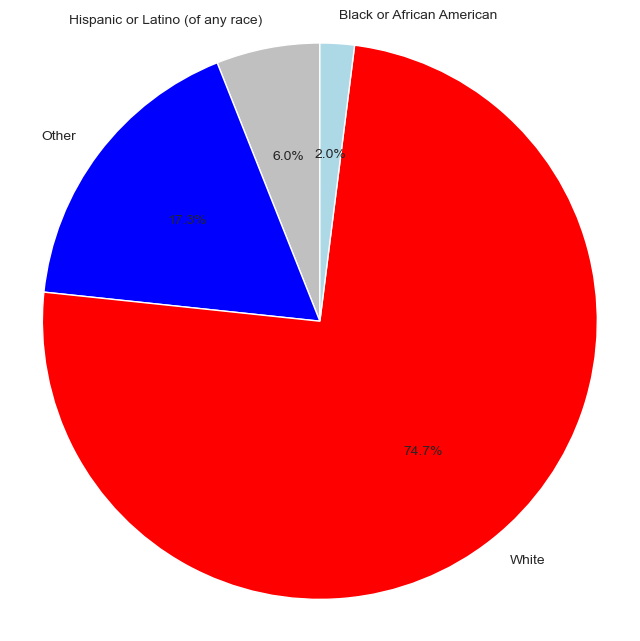

In [5]:
top_labels = top_ethnicity_percentages.index
top_values = top_ethnicity_percentages.values

reordered_labels = [label for label in top_labels if label != "Black or African American"] + ["Black or African American"]
reordered_values = [value for label, value in zip(top_labels, top_values) if label != "Black or African American"] + [top_values[top_labels == "Black or African American"]]

colors = ['#C0C0C0', '#0000FF', '#FF0000', '#ADD8E6']

plt.figure(figsize=(8, 8))

sns.set(style="darkgrid")
plt.rcParams["patch.force_edgecolor"] = True

plt.pie(reordered_values, labels=reordered_labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle


plt.show()



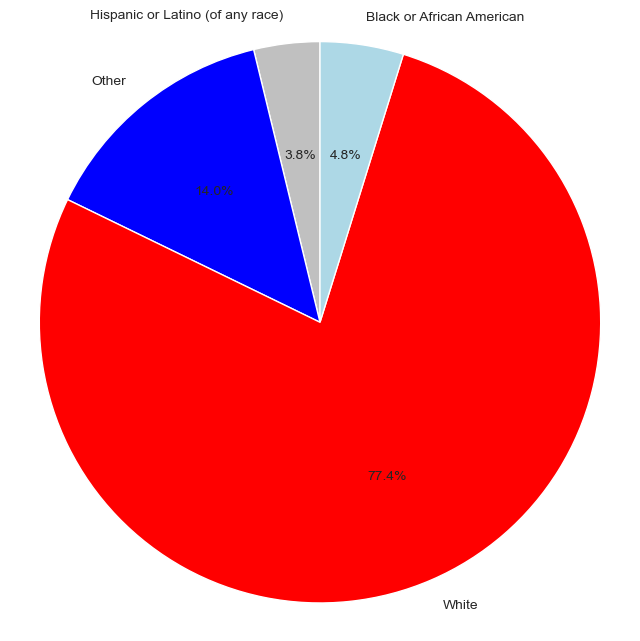

In [6]:
bottom_labels = bottom_ethnicity_percentages.index
bottom_values = bottom_ethnicity_percentages.values

reordered_labels = [label for label in bottom_labels if label != "Black or African American"] + ["Black or African American"]
reordered_values = [value for label, value in zip(bottom_labels, bottom_values) if label != "Black or African American"] + [bottom_values[bottom_labels == "Black or African American"]]

colors = ['#C0C0C0', '#0000FF', '#FF0000', '#ADD8E6']

# Create the pie chart
plt.figure(figsize=(8, 8))

# shadow effect
sns.set(style="darkgrid")
plt.rcParams["patch.force_edgecolor"] = True

# pie chart
plt.pie(reordered_values, labels=reordered_labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()